<h1 align='center'>Suicide Rates Exploratory Data Analysis</h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('master.csv')

In [3]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


Focus on just United States data.

In [4]:
us_df = df[df.country == 'United States'].copy()

In [5]:
us_df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
26848,United States,1985,male,75+ years,2177,4064000,53.57,United States1985,0.841,"4,346,734,000,000",19693,G.I. Generation
26849,United States,1985,male,55-74 years,5302,17971000,29.50,United States1985,0.841,"4,346,734,000,000",19693,G.I. Generation
26850,United States,1985,male,25-34 years,5134,20986000,24.46,United States1985,0.841,"4,346,734,000,000",19693,Boomers
26851,United States,1985,male,35-54 years,6053,26589000,22.77,United States1985,0.841,"4,346,734,000,000",19693,Silent
26852,United States,1985,male,15-24 years,4267,19962000,21.38,United States1985,0.841,"4,346,734,000,000",19693,Generation X


## Find total suicide rate (regardless of age) by year

In [6]:
suc_sum = us_df.groupby('year').suicides_no.agg(['sum']).reset_index()

In [7]:
suc_sum.columns = ['year', 'us_suicides']

In [8]:
suc_sum.head()

,year,us_suicides
0,1985,29446
1,1986,30892
2,1987,30783
3,1988,30388
4,1989,30218


In [9]:
pop_sum = us_df.groupby('year').population.agg(['sum']).reset_index()

In [10]:
pop_sum.columns = ['year', 'us_population']

In [11]:
pop_sum.head()

,year,us_population
0,1985,220723000
1,1986,222953000
2,1987,225148000
3,1988,227353000
4,1989,229487000


In [12]:
us_suc_rates = suc_sum.merge(pop_sum, on='year')

In [13]:
us_suc_rates.loc[:, 's_per_100k'] = us_suc_rates.us_suicides * 100000 / us_suc_rates.us_population

In [14]:
us_suc_rates.head()

,year,us_suicides,us_population,s_per_100k
0,1985,29446,220723000,13.340703
1,1986,30892,222953000,13.855835
2,1987,30783,225148000,13.672340
3,1988,30388,227353000,13.365999
4,1989,30218,229487000,13.167630


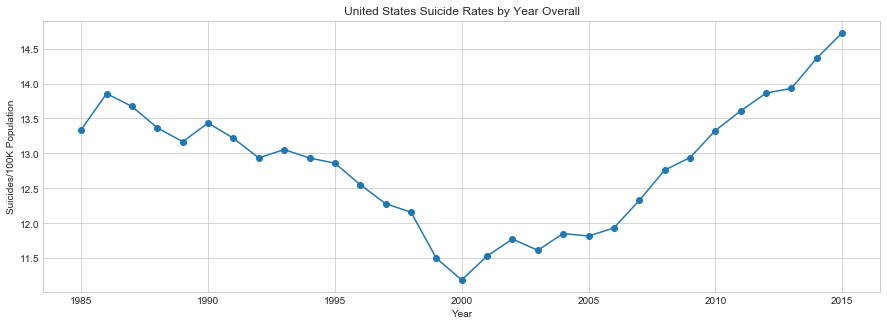

In [23]:
x = us_suc_rates.year
y = us_suc_rates.s_per_100k
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(15,5))
plt.plot(x, y, marker='o')
plt.xlabel('Year')
plt.ylabel('Suicides/100K Population')
plt.title('United States Suicide Rates by Year Overall')
plt.show()

Suicide rates are on the rise in the United States, looks like they hit a relative low in the year 2000, but have risen ever since.\
Data available for 2016-2018???

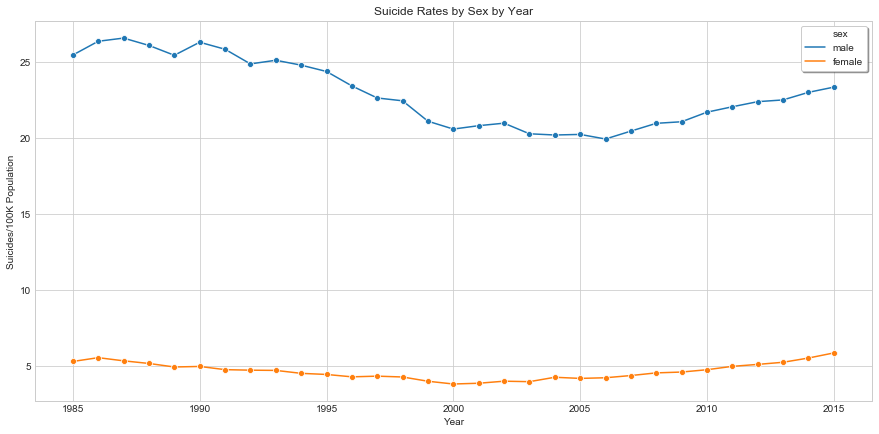

In [22]:
plt.figure(figsize=(15,7))
sns.lineplot(x='year', y='suicides/100k pop', hue='sex', data=us_df, ci=None, marker='o')
plt.legend(shadow=True, frameon=True)
plt.title('Suicide Rates by Sex by Year')
plt.ylabel('Suicides/100K Population')
plt.xlabel('Year')
plt.show()

Women, on average, have a much lower suicide rate than men, but the rates for both sexes have been increasing in recent years.

In [16]:
us_df.loc[:, 'age'] = us_df.loc[:, 'age'].astype('category')

In [17]:
us_df.loc[:, 'age'] = us_df.age.cat.reorder_categories(['5-14 years',
                                                        '15-24 years',
                                                        '25-34 years',
                                                        '35-54 years',
                                                        '55-74 years',
                                                        '75+ years',
                                                        ])

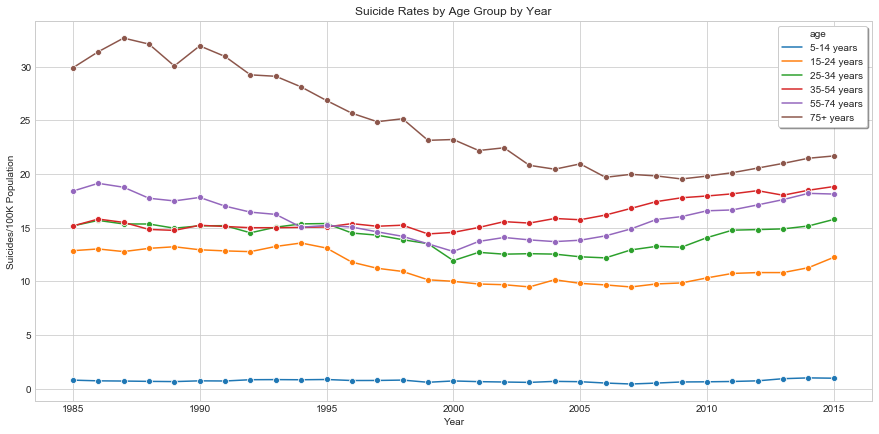

In [18]:
plt.figure(figsize=(15,7))
sns.lineplot(x='year', y='suicides/100k pop', hue='age', data=us_df, ci=None, marker='o')
plt.legend(shadow=True, frameon=True)
plt.title('Suicide Rates by Age Group by Year')
plt.ylabel('Suicides/100K Population')
plt.xlabel('Year')
plt.show()

Again, it looks like suicide rates have been rising for each group since 2009 at the latest, for some age groups the rate has been rising since 2000, much like the overall rate. It may be of use to dig in and look at each age group on its own.

In [19]:
us_df.loc[:, 'age'].cat.categories

Index(['5-14 years', '15-24 years', '25-34 years', '35-54 years',
       '55-74 years', '75+ years'],
      dtype='object')

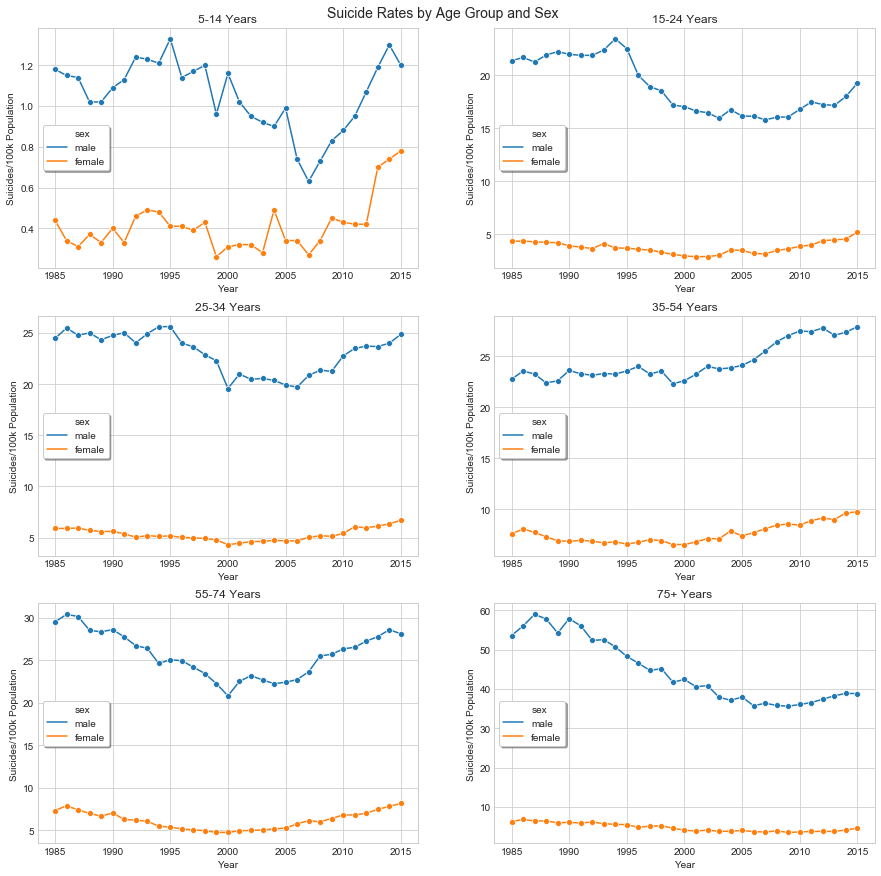

In [20]:
plt.figure(figsize=(15,15))
for i, cat in enumerate(us_df.age.cat.categories, start=1):
    plt.subplot(3, 2, i)
    sns.lineplot(x='year', y='suicides/100k pop', hue='sex', data=us_df[us_df.age == cat], ci=None, marker='o')
    plt.legend(loc='center left', frameon=True, shadow=True)
    plt.xlabel('Year')
    plt.ylabel('Suicides/100k Population')
    plt.title(cat.title())
plt.suptitle('Suicide Rates by Age Group and Sex', y=.9, size=14)
plt.show()

It appears that regardless of age and sex the suicide rates have mostly been increasing in the US since the year 2000 (generally).

## The Problem

Suicide rates in America seem to be a problem, is there something that can be done to help address this problem? What can we do and how can it be implemented? What methods have been shown to help decrease suicide rates in America? Can we improve upon them? Can we test this? Is it ethical to test this?